# Miniproyecto - Ciencia de Datos

Elaborado por Roberto Alonso Herraiz.

# Paso 1

Cargamos el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd

raw_sales = pd.read_csv('sales.csv')

raw_sales

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
205,196,38.2,3.7,13.8,7.6
206,197,94.2,4.9,8.1,9.7
207,198,177.0,9.3,6.4,12.8
208,199,NaN,42.0,66.2,25.5


In [2]:
raw_sales.describe()

,id,TV,radio,newspaper,sales
count,210.000000,2.070000e+02,210.000000,210.000000,210.000000
mean,100.809524,1.449275e+10,23.200476,30.294762,13.959048
std,57.399481,1.198000e+11,14.827575,21.726517,5.196055
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,52.250000,7.405000e+01,10.025000,12.025000,10.400000
50%,101.500000,1.498000e+02,22.400000,25.750000,12.900000
75%,149.750000,2.200500e+02,36.575000,44.900000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


# 1.1 - Limpiar el conjunto de datos

Usamos `.dropna()` para eliminar las filas con NaN y `.drop_duplicates('id')` para eliminar las campañas duplicadas

In [3]:
sales = raw_sales.dropna().drop_duplicates('id')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 209
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         197 non-null    int64  
 1   TV         197 non-null    float64
 2   radio      197 non-null    float64
 3   newspaper  197 non-null    float64
 4   sales      197 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.2 KB


Parece que tenemos varios valores inmensamente grandes en sales.TV, vamos a buscarlos y limpiarlos

In [5]:
sales.sort_values('TV', ascending=False)

,id,TV,radio,newspaper,sales
15,15,1.000000e+12,32.9,46.0,19.0
58,58,1.000000e+12,19.2,16.6,13.2
98,95,1.000000e+12,14.0,10.9,11.5
105,102,2.964000e+02,36.3,100.9,23.8
43,43,2.936000e+02,27.7,1.8,20.7
...,...,...,...,...,...
131,127,7.800000e+00,38.9,50.6,6.6
57,57,7.300000e+00,28.1,41.4,5.5
81,79,5.400000e+00,29.9,9.4,5.3
165,156,4.100000e+00,11.6,5.7,3.2


Utilizamos una máscara para mostrar solo los valores de la columna TV mayores de 300 y luego reescribimos nuestro conjunto de datos

In [6]:
sales = sales[sales.TV < 300] # los mayores

Comprobamos:

In [7]:
sales.sort_values('TV', ascending=False)

,id,TV,radio,newspaper,sales
105,102,296.4,36.3,100.9,23.8
43,43,293.6,27.7,1.8,20.7
31,31,292.9,28.3,43.2,21.4
36,36,290.7,4.1,8.5,12.8
102,99,289.7,42.3,51.2,25.4
...,...,...,...,...,...
131,127,7.8,38.9,50.6,6.6
57,57,7.3,28.1,41.4,5.5
81,79,5.4,29.9,9.4,5.3
165,156,4.1,11.6,5.7,3.2


# 1.2 - Representación usando `sns.regplot` y calculando el coeficiente de correlación de Pearson

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # usamos el estilo seaborn en todos los plots

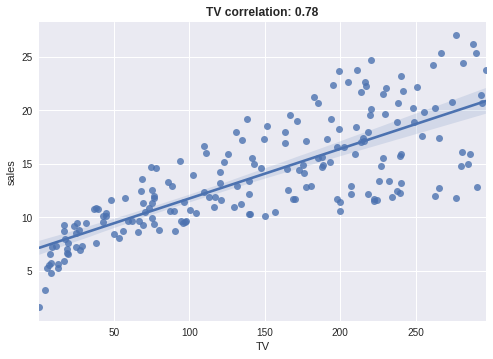

In [9]:
Pearson_TV = np.corrcoef(sales.TV, sales.sales)

sns.regplot(sales.TV, sales.sales)

title = f'TV correlation: {Pearson_TV[0][1]:.2f}'

title_dict={'fontweight': 1000}

plt.title(title, fontdict=title_dict);

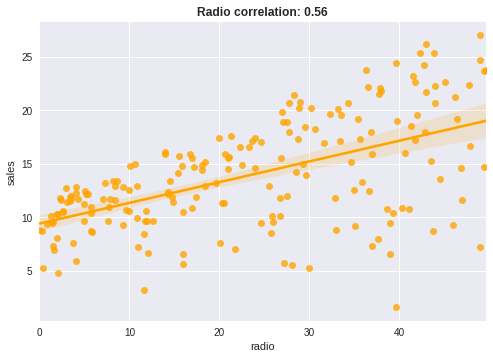

In [10]:
Pearson_radio = np.corrcoef(sales.radio, sales.sales)

sns.regplot(sales.radio, sales.sales, color='ORANGE')

title = f'Radio correlation: {Pearson_radio[0][1]:.2f}'

plt.title(title, fontdict=title_dict);

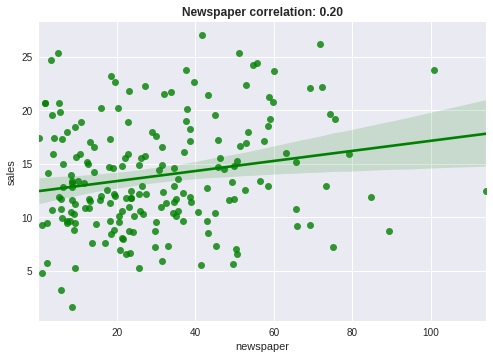

In [11]:
Pearson_newspaper = np.corrcoef(sales.newspaper, sales.sales)

sns.regplot(sales.newspaper, sales.sales, color='GREEN')

title = f'Newspaper correlation: {Pearson_newspaper[0][1]:.2f}'

plt.title(title, fontdict=title_dict);

# Paso 2

### 2.1 Añadir columna con cantidad total invertida por venta

In [12]:
# TIPS -> Total Investment Per Sale
sales['TIPS'] = (sales['TV'] + sales['radio'] + sales['newspaper']) / sales['sales']

In [13]:
sales.describe()

,id,TV,radio,newspaper,sales,TIPS
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,100.474227,145.444845,23.001031,30.246392,13.868557,14.020219
std,57.831646,86.032061,14.846077,21.747570,5.135792,4.185965
min,1.000000,0.700000,0.000000,0.300000,1.600000,2.437500
25%,50.250000,71.300000,9.675000,12.650000,10.300000,11.209759
50%,101.500000,148.500000,22.400000,25.600000,12.850000,13.599299
75%,150.750000,218.475000,36.450000,43.275000,17.275000,15.854725
max,200.000000,296.400000,49.600000,114.000000,27.000000,30.625000


## 2.2 Añadir una columna que indique si la campaña ha sido exitosa. Para ello, debe cumplir:
- Cantidad total invertida por venta es mayor de 20€
- Vendidas más de 15k unidades

In [14]:
success = (sales.TIPS < 20) & (sales.sales > 15)

In [15]:
success.describe()

count       194
unique        2
top       False
freq        124
dtype: object

In [16]:
sales['success'] = success

In [17]:
sales

,id,TV,radio,newspaper,sales,TIPS,success
0,1,230.1,37.8,69.2,22.1,15.253394,True
1,2,44.5,39.3,45.1,10.4,12.394231,False
2,3,17.2,45.9,69.3,9.3,14.236559,False
3,4,151.5,41.3,58.5,18.5,13.583784,True
4,5,180.8,10.8,58.4,12.9,19.379845,False
...,...,...,...,...,...,...,...
204,195,149.7,35.6,6.0,17.3,11.057803,True
205,196,38.2,3.7,13.8,7.6,7.328947,False
206,197,94.2,4.9,8.1,9.7,11.051546,False
207,198,177.0,9.3,6.4,12.8,15.054688,False


## Responder a la pregunta: **¿Cuántas campañas fueron exitosas?**

In [18]:
sales[sales.success == True]

,id,TV,radio,newspaper,sales,TIPS,success
0,1,230.1,37.8,69.2,22.1,15.253394,True
3,4,151.5,41.3,58.5,18.5,13.583784,True
12,12,214.7,24.0,4.0,17.4,13.948276,True
16,16,195.4,47.7,52.9,22.4,13.214286,True
18,18,281.4,39.6,55.8,24.4,15.442623,True
...,...,...,...,...,...,...,...
195,186,205.0,45.1,19.6,22.6,11.933628,True
197,188,191.1,28.7,18.2,17.3,13.757225,True
198,189,286.0,13.9,3.7,15.9,19.094340,True
203,194,166.8,42.0,3.6,19.6,10.836735,True


### Según los criterios establecidos, un total de **70 campañas** fueron exitosas.

# Pasos 3 y 4, usando los tres tipos de clasificadores

Para utilizar los clasificadores necesitaremos un total de cuatro dataframes.
- Uno de entrenamiento (los de id <= 160), que se dividirá en `X` (los conjuntos de datos a entrenar) y en `y` (el resultado con el que entrenaremos a los datos)
- Uno de test (los de id > 160), que se dividirán igualmente en dos y nos servirá para hacer las predicciones una vez hayamos entrenado a nuestro modelo.

Se nos pide calcular los falsos positivos y los falsos negativos de las predicciones sobre nuestro conjunto de validación.

Esto se realiza calculando la matriz de confusión, usando `confusion_matrix()` que en nuestro caso tendrán la siguiente forma:

`array([Verdaderos negativos, Falsos positivos],
       [Falsos negativos, Verdaderos positivos])`
       
Para realizar todo esto, haremos un bucle sobre nuestra lista con los clasificadores:

In [19]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix

train = sales[sales.id <= 160] # 155
test = sales[sales.id > 160] # 39

X = train[['TV', 'radio', 'newspaper']]
y = train['success']

clfs = [
    GaussianNB(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=100)
]

for clf in clfs:
    clf.fit(X, y)
    print(clf)
    print(len(str(clf))*'-')
    print(f'Train accuracy: {accuracy_score(y, clf.predict(X)):.5f}',)
    y_pred = clf.predict(test[['TV', 'radio', 'newspaper']])
    y_true = test['success']
    print(f'Validation accuracy: {accuracy_score(y_pred, y_true):.5f}')
    print(f'False positives: {confusion_matrix(y_true, y_pred)[0][1]} of 39')
    print(f'False negatives: {confusion_matrix(y_true, y_pred)[1][0]} of 39')
    print(f'')

GaussianNB()
------------
Train accuracy: 0.93548
Validation accuracy: 0.97436
False positives: 0 of 39
False negatives: 1 of 39

LogisticRegression()
--------------------
Train accuracy: 0.92903
Validation accuracy: 0.97436
False positives: 1 of 39
False negatives: 0 of 39

RandomForestClassifier()
------------------------
Train accuracy: 1.00000
Validation accuracy: 0.94872
False positives: 1 of 39
False negatives: 1 of 39




## **Respondiendo ordenadamente a las preguntas:**

### **- Fracción del conjunto de entrenamiento clasificado correctamente:**

 - **Naive-Bayes:** 93,54% de acierto
 - **Logistic Regression:** 92.90% de acierto
 - **Random Forest:** 100% de acierto
 
### **- Predicciones sobre el conjunto de prueba:**

 - **Naive-Bayes:** 97.44% de acierto
 - **Logistic Regression:** 97.44% de acierto
 - **Random Forest:** 92.31% de acierto
 
### **- Proporción falsos positivos y falsos negativos:**
 - **Naive-Bayes:**
	 - Falsos positivos: 0 de 39 (0%)
	 - Falsos negativos: 1 de 39 (2.56%)
 - **Logistic Regression**:
	 - Falsos positivos: 1 de 39 (2.56%)
	 - Falsos negativos: 0 de 39 (0%)
 - **Ramdom Forest**:
	 - Falsos positivos: 2 de 39 (5.13%)
	 - Falsos negativos: 1 de 39 (2.56%)